In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn import preprocessing
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split

In [101]:
df1 = pd.read_csv('Datasets/Raw_Dataset/Thursday-15-02-2018_TrafficForML_CICFlowMeter.csv')
df2 = df1.groupby(['Timestamp'])['Flow Duration'].count()
df2 = pd.DataFrame(df2).reset_index()
df2.columns=['Timestamp','BiFlowsCount']
df = df1.merge(df2, left_on='Timestamp', right_on='Timestamp')
df = df.sort_values('Timestamp')
df.head()

/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (16,17) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,BiFlowsCount
646748,80,6,15/02/2018 01:00:00,93,2,0,0,0,0,0,...,0.0,0.0,0,0,0.0,0.0,0,0,Benign,6
646747,80,6,15/02/2018 01:00:00,974,3,4,161,488,161,0,...,0.0,0.0,0,0,0.0,0.0,0,0,Benign,6
646746,445,6,15/02/2018 01:00:00,562585,6,5,455,338,140,0,...,0.0,0.0,0,0,0.0,0.0,0,0,Benign,6
646744,3389,6,15/02/2018 01:00:00,3686219,10,11,1272,1893,677,0,...,0.0,0.0,0,0,0.0,0.0,0,0,Benign,6
646745,3389,6,15/02/2018 01:00:00,2530981,8,7,1128,1581,661,0,...,0.0,0.0,0,0,0.0,0.0,0,0,Benign,6


In [24]:
df = pd.read_csv('Datasets/Raw_Dataset/Thursday-01-03-2018_TrafficForML_CICFlowMeter.csv')
df.head()

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (0,1,3,4,5,6,7,8,9,10,11,12,13,14,15,16,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,0,0,01/03/2018 08:17:11,115307855,5,0,0,0,0,0,...,0,1812348,0,1812348,1812348,56700000,6010057.622,61000000,52500000,Benign
1,0,0,01/03/2018 08:20:07,60997457,2,0,0,0,0,0,...,0,0,0,0,0,61000000,0,61000000,61000000,Benign
2,67,17,01/03/2018 08:17:18,61149019,5,0,1500,0,300,300,...,8,3530939,0,3530939,3530939,19200000,12500000,32600000,7999725,Benign
3,0,0,01/03/2018 08:22:09,60997555,2,0,0,0,0,0,...,0,0,0,0,0,61000000,0,61000000,61000000,Benign
4,0,0,01/03/2018 08:24:11,61997503,3,0,0,0,0,0,...,0,999909,0,999909,999909,61000000,0,61000000,61000000,Benign


In [38]:
df = pd.read_csv('Datasets/Raw_Dataset/Wednesday-28-02-2018_TrafficForML_CICFlowMeter.csv')
df.head()

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (0,1,3,4,5,6,7,8,9,10,11,12,13,14,15,16,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Dst Port,Protocol,Timestamp,Flow Duration,Tot Fwd Pkts,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Max,Fwd Pkt Len Min,...,Fwd Seg Size Min,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,443,6,28/02/2018 08:22:13,94658,6,7,708,3718,387,0,...,20,0,0,0,0,0,0,0,0,Benign
1,443,6,28/02/2018 08:22:13,206,2,0,0,0,0,0,...,20,0,0,0,0,0,0,0,0,Benign
2,445,6,28/02/2018 08:22:15,165505,3,1,0,0,0,0,...,20,0,0,0,0,0,0,0,0,Benign
3,443,6,28/02/2018 08:22:16,102429,6,7,708,3718,387,0,...,20,0,0,0,0,0,0,0,0,Benign
4,443,6,28/02/2018 08:22:16,167,2,0,0,0,0,0,...,20,0,0,0,0,0,0,0,0,Benign


In [102]:
features = ['Timestamp', 'Flow Duration', 'Tot Fwd Pkts',
       'Tot Bwd Pkts', 'TotLen Fwd Pkts', 'TotLen Bwd Pkts', 'Fwd Pkt Len Max',
       'Fwd Pkt Len Min', 'Fwd Pkt Len Mean', 'Fwd Pkt Len Std',
       'Bwd Pkt Len Max', 'Bwd Pkt Len Min', 'Bwd Pkt Len Mean',
       'Bwd Pkt Len Std', 'Flow Byts/s', 'Flow Pkts/s', 'Flow IAT Mean',
       'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Tot',
       'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min',
       'Bwd IAT Tot', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max',
       'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags', 'Fwd URG Flags',
       'Bwd URG Flags', 'Fwd Header Len', 'Bwd Header Len', 'Fwd Pkts/s',
       'Bwd Pkts/s', 'Pkt Len Min', 'Pkt Len Max', 'Pkt Len Mean',
       'Pkt Len Std', 'Pkt Len Var', 'FIN Flag Cnt', 'SYN Flag Cnt',
       'RST Flag Cnt', 'PSH Flag Cnt', 'ACK Flag Cnt', 'URG Flag Cnt',
       'CWE Flag Count', 'ECE Flag Cnt', 'Down/Up Ratio', 'Pkt Size Avg',
       'Fwd Seg Size Avg', 'Bwd Seg Size Avg', 'Fwd Byts/b Avg',
       'Fwd Pkts/b Avg', 'Fwd Blk Rate Avg', 'Bwd Byts/b Avg',
       'Bwd Pkts/b Avg', 'Bwd Blk Rate Avg', 'Subflow Fwd Pkts',
       'Subflow Fwd Byts', 'Subflow Bwd Pkts', 'Subflow Bwd Byts',
       'Init Fwd Win Byts', 'Init Bwd Win Byts', 'Fwd Act Data Pkts',
       'Fwd Seg Size Min', 'Active Mean', 'Active Std', 'Active Max',
       'Active Min', 'Idle Mean', 'Idle Std', 'Idle Max', 'Idle Min', 'BiFlowsCount']

In [103]:
X = df[features]
X[features] = X[features].apply(pd.to_numeric, errors='coerce', axis=1)

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3509: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [104]:
def targetify(s):
    if s == 'Benign':
        return 0
    else:
        return 1

In [105]:
df['Target']=df['Label'].apply(targetify)

In [106]:
y = df['Target']

In [107]:
X = X.fillna(0)

In [108]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print (X_train.shape, y_train.shape)
print( X_test.shape, y_test.shape)

(838860, 78) (838860,)
(209715, 78) (209715,)


In [109]:
# sampling got different result. I'll use the raw data instead

# X_train2 = X_train.sample(frac=0.1, replace=True, random_state=1)
# y_train2 = y_train.sample(frac=0.1, replace=True, random_state=1)
# X_test2 = X_test.sample(frac=0.1, replace=True, random_state=1)
# y_test2 = y_test.sample(frac=0.1, replace=True, random_state=1)
# print (X_train2.shape, y_train2.shape)
# print( X_test2.shape, y_test2.shape)

In [110]:
# I'm not even normalizing the data

# min_max_scaler = preprocessing.MinMaxScaler()
# x_scaled_train = min_max_scaler.fit_transform(X_train.values)

In [111]:
forest = ExtraTreesClassifier(n_estimators=200, random_state=0)

In [112]:
forest.fit(X_train, y_train)

ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
                     max_depth=None, max_features='auto', max_leaf_nodes=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=200,
                     n_jobs=None, oob_score=False, random_state=0, verbose=0,
                     warm_start=False)

In [113]:
importances = forest.feature_importances_

In [114]:
std = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

In [115]:
# Print the feature ranking
print("Feature ranking:")

for f in range(X_train.shape[1]):
    print("%d. feature %d: %s (%f)" % (f + 1, indices[f], X_train.columns[indices[f]], importances[indices[f]]))

Feature ranking:
1. feature 68: Fwd Seg Size Min (0.233805)
2. feature 65: Init Fwd Win Byts (0.098576)
3. feature 77: BiFlowsCount (0.075053)
4. feature 10: Bwd Pkt Len Max (0.028162)
5. feature 21: Fwd IAT Mean (0.027744)
6. feature 39: Pkt Len Max (0.023559)
7. feature 26: Bwd IAT Mean (0.022693)
8. feature 23: Fwd IAT Max (0.021849)
9. feature 24: Fwd IAT Min (0.021385)
10. feature 20: Fwd IAT Tot (0.019965)
11. feature 47: ACK Flag Cnt (0.019701)
12. feature 28: Bwd IAT Max (0.018476)
13. feature 1: Flow Duration (0.017440)
14. feature 19: Flow IAT Min (0.017331)
15. feature 18: Flow IAT Max (0.015971)
16. feature 76: Idle Min (0.015757)
17. feature 17: Flow IAT Std (0.015435)
18. feature 16: Flow IAT Mean (0.015206)
19. feature 29: Bwd IAT Min (0.013851)
20. feature 13: Bwd Pkt Len Std (0.013671)
21. feature 25: Bwd IAT Tot (0.013532)
22. feature 34: Fwd Header Len (0.013222)
23. feature 46: PSH Flag Cnt (0.012994)
24. feature 75: Idle Max (0.012760)
25. feature 66: Init Bwd Win 

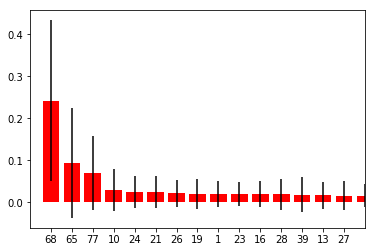

In [91]:
# Plot the top x feature importances of the forest
top_x = 15

plt.figure()
# plt.title("Feature Importances")
plt.bar(range(X_train.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(top_x), indices)
plt.xlim([-1, top_x])
plt.show()

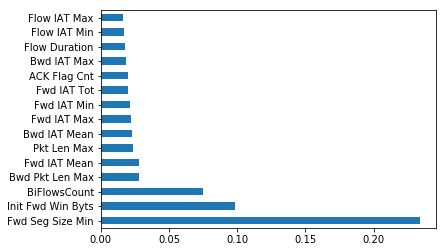

In [116]:
plt = pd.Series(forest.feature_importances_, index=X_train.columns).nlargest(top_x).plot(kind='barh')
fig = plt.get_figure()
fig.savefig('figure.jpg', bbox_inches = "tight")

In [169]:
forest.feature_importances_

array([0.00000000e+00, 1.77531084e-02, 8.26978006e-03, 1.35481683e-02,
       3.90098818e-02, 4.58018504e-03, 4.25642612e-02, 7.30067210e-06,
       7.28561812e-02, 1.60425998e-01, 2.62434368e-02, 5.47349371e-06,
       2.36912566e-02, 2.43018003e-02, 1.31416082e-04, 6.14946509e-03,
       1.66469728e-02, 1.96355383e-02, 1.00257213e-02, 8.31872149e-04,
       1.50853961e-02, 1.44051772e-02, 1.47956565e-02, 2.07152945e-02,
       1.56834466e-04, 4.51513012e-04, 1.43179374e-03, 1.20865772e-03,
       8.84441391e-04, 5.34347708e-04, 1.09301068e-05, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 1.01532199e-03, 6.57869419e-04,
       4.74373772e-03, 3.20608021e-03, 3.34228263e-06, 3.01428114e-02,
       1.20506169e-02, 1.01833622e-01, 3.81262362e-02, 2.67894423e-04,
       1.00497076e-05, 1.15085608e-06, 2.16366847e-02, 2.09291493e-02,
       4.02431411e-03, 0.00000000e+00, 9.21450499e-07, 4.56740837e-03,
       2.32204267e-02, 9.33921382e-02, 1.80192341e-02, 0.00000000e+00,
      

In [171]:
X_train.columns

Index(['Timestamp', 'Flow Duration', 'Tot Fwd Pkts', 'Tot Bwd Pkts',
       'TotLen Fwd Pkts', 'TotLen Bwd Pkts', 'Fwd Pkt Len Max',
       'Fwd Pkt Len Min', 'Fwd Pkt Len Mean', 'Fwd Pkt Len Std',
       'Bwd Pkt Len Max', 'Bwd Pkt Len Min', 'Bwd Pkt Len Mean',
       'Bwd Pkt Len Std', 'Flow Byts/s', 'Flow Pkts/s', 'Flow IAT Mean',
       'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Tot',
       'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min',
       'Bwd IAT Tot', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max',
       'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags', 'Fwd URG Flags',
       'Bwd URG Flags', 'Fwd Header Len', 'Bwd Header Len', 'Fwd Pkts/s',
       'Bwd Pkts/s', 'Pkt Len Min', 'Pkt Len Max', 'Pkt Len Mean',
       'Pkt Len Std', 'Pkt Len Var', 'FIN Flag Cnt', 'SYN Flag Cnt',
       'RST Flag Cnt', 'PSH Flag Cnt', 'ACK Flag Cnt', 'URG Flag Cnt',
       'CWE Flag Count', 'ECE Flag Cnt', 'Down/Up Ratio', 'Pkt Size Avg',
       'Fwd Seg Size Avg', 'Bw

In [50]:
# for comparison

str_friday = ""
for f in range(X_train.shape[1]):
    str_friday = str_friday + "%s:%f|" % (X_train.columns[indices[f]], importances[indices[f]])
print(str_friday)

Fwd Seg Size Min:0.255476|Init Fwd Win Byts:0.109916|CountOfOtherBiFlowsAtThisTimestamp:0.075679|Bwd IAT Mean:0.024783|Fwd IAT Min:0.024435|Bwd IAT Max:0.021328|Pkt Len Max:0.021287|Bwd Pkt Len Max:0.021012|Flow IAT Min:0.018858|ACK Flag Cnt:0.018694|Fwd IAT Max:0.018223|Bwd Pkt Len Std:0.017492|Fwd IAT Mean:0.017261|Flow IAT Mean:0.016852|Flow IAT Std:0.016624|PSH Flag Cnt:0.016086|Flow Duration:0.015931|Idle Mean:0.015561|Idle Max:0.015188|Fwd IAT Tot:0.015135|Idle Min:0.013750|Init Bwd Win Byts:0.013706|Flow IAT Max:0.013150|Bwd IAT Min:0.012995|Fwd Header Len:0.011957|Bwd Pkt Len Mean:0.011104|Bwd IAT Tot:0.010600|Bwd IAT Std:0.010211|Pkt Len Std:0.009469|Bwd Seg Size Avg:0.009411|Fwd Pkts/s:0.008303|Pkt Len Var:0.007973|Flow Pkts/s:0.006211|Tot Fwd Pkts:0.006194|Pkt Size Avg:0.005819|Fwd IAT Std:0.005785|Fwd Act Data Pkts:0.005384|Fwd Pkt Len Std:0.005244|Tot Bwd Pkts:0.005099|Bwd Pkts/s:0.005099|Fwd Pkt Len Max:0.004558|Fwd Seg Size Avg:0.004550|Pkt Len Mean:0.004488|Subflow Bwd 

In [37]:
str_thursday = ""
for f in range(X_train.shape[1]):
    str_thursday = str_thursday + "%s:%f|" % (X_train.columns[indices[f]], importances[indices[f]])
print(str_thursday)

Init Fwd Win Byts:0.061539|Fwd Pkts/s:0.060097|Flow Pkts/s:0.059386|Flow Duration:0.056493|Bwd Pkts/s:0.055804|Flow IAT Min:0.052922|Flow IAT Max:0.051991|Flow IAT Mean:0.050521|Flow Byts/s:0.042400|Fwd Seg Size Min:0.028181|Flow IAT Std:0.026345|Fwd IAT Min:0.025869|Fwd IAT Mean:0.024724|Fwd IAT Max:0.024601|Fwd IAT Tot:0.023972|Fwd IAT Std:0.020125|PSH Flag Cnt:0.017975|Init Bwd Win Byts:0.016564|Bwd IAT Min:0.015904|Bwd IAT Mean:0.015299|Bwd IAT Max:0.014808|Bwd IAT Tot:0.014600|Down/Up Ratio:0.012596|Bwd IAT Std:0.012541|Fwd Pkt Len Max:0.010109|Fwd Pkt Len Mean:0.009687|Fwd Seg Size Avg:0.009214|Fwd Pkt Len Std:0.008614|Pkt Len Mean:0.007190|Pkt Size Avg:0.006791|Fwd Header Len:0.006710|Bwd Seg Size Avg:0.006588|Pkt Len Std:0.006541|TotLen Fwd Pkts:0.006460|Subflow Fwd Pkts:0.006428|Bwd Pkt Len Mean:0.006416|Tot Fwd Pkts:0.006221|Pkt Len Max:0.005986|Pkt Len Var:0.005960|Subflow Fwd Byts:0.005959|TotLen Bwd Pkts:0.005474|Idle Min:0.005473|Idle Std:0.005426|ACK Flag Cnt:0.005422|Ac

In [53]:
str_wednesday = ""
for f in range(X_train.shape[1]):
    str_wednesday = str_wednesday + "%s:%f|" % (X_train.columns[indices[f]], importances[indices[f]])
print(str_wednesday)

Flow IAT Max:0.067092|Flow Pkts/s:0.057136|Flow Duration:0.056627|Fwd Pkts/s:0.056345|Flow IAT Min:0.055758|Flow IAT Mean:0.053673|Init Fwd Win Byts:0.051534|Bwd Pkts/s:0.050122|Flow Byts/s:0.047633|Fwd IAT Tot:0.038297|Fwd IAT Max:0.035752|Bwd IAT Tot:0.031661|Flow IAT Std:0.028990|Fwd IAT Min:0.027246|Bwd IAT Max:0.026499|Fwd IAT Mean:0.025875|Fwd IAT Std:0.023353|Idle Max:0.018686|Bwd IAT Mean:0.015672|Bwd IAT Min:0.015092|Bwd IAT Std:0.014375|Idle Mean:0.013183|Init Bwd Win Byts:0.012746|Idle Min:0.011580|Active Min:0.007845|Active Max:0.007686|Active Mean:0.007610|Pkt Len Std:0.007555|Pkt Len Mean:0.006938|Pkt Size Avg:0.006935|Idle Std:0.006855|Pkt Len Var:0.006731|Fwd Pkt Len Mean:0.006169|Fwd Seg Size Avg:0.006088|Bwd Seg Size Avg:0.005966|Fwd Pkt Len Max:0.005961|Bwd Pkt Len Mean:0.005925|TotLen Fwd Pkts:0.005721|Subflow Fwd Byts:0.005655|Subflow Bwd Byts:0.005496|TotLen Bwd Pkts:0.005490|Active Std:0.004307|Fwd Pkt Len Std:0.004264|Pkt Len Max:0.004026|Bwd Pkt Len Std:0.00394

In [53]:
l_fri = str_friday.split("|")
#l_thur = str_thursday.split("|")
#l_wed = str_wednesday.split("|")

In [57]:
print(l_fri)
print(l_thur)
print(l_wed)

['Fwd Pkt Len Std:0.169705', 'Fwd Seg Size Avg:0.104993', 'Pkt Len Std:0.093775', 'Fwd Pkt Len Mean:0.068130', 'Fwd Pkt Len Max:0.047931', 'Pkt Len Var:0.037537', 'Bwd Pkt Len Max:0.034938', 'TotLen Fwd Pkts:0.032243', 'Pkt Size Avg:0.028804', 'Pkt Len Max:0.026093', 'Bwd Seg Size Avg:0.024500', 'Bwd Pkt Len Std:0.024202', 'Bwd Pkt Len Mean:0.024041', 'PSH Flag Cnt:0.022592', 'Fwd IAT Max:0.020447', 'Flow IAT Std:0.019717', 'ACK Flag Cnt:0.017972', 'Flow IAT Mean:0.016944', 'Subflow Fwd Byts:0.016788', 'Init Fwd Win Byts:0.015930', 'Fwd IAT Std:0.014409', 'Flow Duration:0.013554', 'Tot Bwd Pkts:0.013419', 'Init Bwd Win Byts:0.013109', 'Pkt Len Mean:0.011986', 'Fwd IAT Tot:0.011015', 'Fwd IAT Mean:0.010343', 'Tot Fwd Pkts:0.008099', 'Flow IAT Max:0.008076', 'Flow Pkts/s:0.006377', 'Fwd Pkts/s:0.005443', 'Down/Up Ratio:0.004960', 'TotLen Bwd Pkts:0.004562', 'URG Flag Cnt:0.004517', 'Subflow Fwd Pkts:0.003970', 'Subflow Bwd Pkts:0.003591', 'Bwd Pkts/s:0.003246', 'Idle Mean:0.001705', 'Bwd

In [54]:
import re

In [55]:
d_fri = {}
# d = {}
# idx = int(l_fri[0].find(":"))
# d[str(l_fri[0][:idx])] = float(l_fri[0][idx+1:])
# print(d)
for i in range(len(l_fri)-1):
    idx = int(l_fri[i].find(":"))
    d_fri[str(l_fri[i][:idx])] = float(l_fri[i][idx+1:])
print(d_fri.keys())

dict_keys(['Fwd Seg Size Min', 'Init Fwd Win Byts', 'CountOfOtherBiFlowsAtThisTimestamp', 'Bwd IAT Mean', 'Fwd IAT Min', 'Bwd IAT Max', 'Pkt Len Max', 'Bwd Pkt Len Max', 'Flow IAT Min', 'ACK Flag Cnt', 'Fwd IAT Max', 'Bwd Pkt Len Std', 'Fwd IAT Mean', 'Flow IAT Mean', 'Flow IAT Std', 'PSH Flag Cnt', 'Flow Duration', 'Idle Mean', 'Idle Max', 'Fwd IAT Tot', 'Idle Min', 'Init Bwd Win Byts', 'Flow IAT Max', 'Bwd IAT Min', 'Fwd Header Len', 'Bwd Pkt Len Mean', 'Bwd IAT Tot', 'Bwd IAT Std', 'Pkt Len Std', 'Bwd Seg Size Avg', 'Fwd Pkts/s', 'Pkt Len Var', 'Flow Pkts/s', 'Tot Fwd Pkts', 'Pkt Size Avg', 'Fwd IAT Std', 'Fwd Act Data Pkts', 'Fwd Pkt Len Std', 'Tot Bwd Pkts', 'Bwd Pkts/s', 'Fwd Pkt Len Max', 'Fwd Seg Size Avg', 'Pkt Len Mean', 'Subflow Bwd Pkts', 'Subflow Fwd Pkts', 'Idle Std', 'Bwd Header Len', 'RST Flag Cnt', 'SYN Flag Cnt', 'Active Mean', 'Fwd PSH Flags', 'ECE Flag Cnt', 'Active Min', 'Down/Up Ratio', 'Fwd Pkt Len Mean', 'URG Flag Cnt', 'Subflow Bwd Byts', 'TotLen Fwd Pkts', 'Fl

In [145]:
d_thur = {}
for i in range(len(l_thur)-1):
    idx = int(l_thur[i].find(":"))
    d_thur[str(l_thur[i][:idx])] = float(l_thur[i][idx+1:])
# print(d_thur)
print(d_thur.keys())

dict_keys(['Init Fwd Win Byts', 'Fwd Pkts/s', 'Flow Pkts/s', 'Flow Duration', 'Bwd Pkts/s', 'Flow IAT Min', 'Flow IAT Max', 'Flow IAT Mean', 'Flow Byts/s', 'Fwd Seg Size Min', 'Flow IAT Std', 'Fwd IAT Min', 'Fwd IAT Mean', 'Fwd IAT Max', 'Fwd IAT Tot', 'Fwd IAT Std', 'PSH Flag Cnt', 'Init Bwd Win Byts', 'Bwd IAT Min', 'Bwd IAT Mean', 'Bwd IAT Max', 'Bwd IAT Tot', 'Down/Up Ratio', 'Bwd IAT Std', 'Fwd Pkt Len Max', 'Fwd Pkt Len Mean', 'Fwd Seg Size Avg', 'Fwd Pkt Len Std', 'Pkt Len Mean', 'Pkt Size Avg', 'Fwd Header Len', 'Bwd Seg Size Avg', 'Pkt Len Std', 'TotLen Fwd Pkts', 'Subflow Fwd Pkts', 'Bwd Pkt Len Mean', 'Tot Fwd Pkts', 'Pkt Len Max', 'Pkt Len Var', 'Subflow Fwd Byts', 'TotLen Bwd Pkts', 'Idle Min', 'Idle Std', 'ACK Flag Cnt', 'Active Min', 'Bwd Pkt Len Max', 'Active Mean', 'Active Max', 'Bwd Pkt Len Std', 'Subflow Bwd Byts', 'Idle Mean', 'Idle Max', 'Bwd Header Len', 'Bwd Pkt Len Min', 'ECE Flag Cnt', 'Active Std', 'Fwd Act Data Pkts', 'Subflow Bwd Pkts', 'Tot Bwd Pkts', 'Fwd 

In [113]:
d_wed = {}
for i in range(len(l_wed)-1):
    idx = int(l_wed[i].find(":"))
    d_wed[str(l_wed[i][:idx])] = float(l_wed[i][idx+1:])
print(d_wed)

{'Flow IAT Max': 0.067092, 'Flow Pkts/s': 0.057136, 'Flow Duration': 0.056627, 'Fwd Pkts/s': 0.056345, 'Flow IAT Min': 0.055758, 'Flow IAT Mean': 0.053673, 'Init Fwd Win Byts': 0.051534, 'Bwd Pkts/s': 0.050122, 'Flow Byts/s': 0.047633, 'Fwd IAT Tot': 0.038297, 'Fwd IAT Max': 0.035752, 'Bwd IAT Tot': 0.031661, 'Flow IAT Std': 0.02899, 'Fwd IAT Min': 0.027246, 'Bwd IAT Max': 0.026499, 'Fwd IAT Mean': 0.025875, 'Fwd IAT Std': 0.023353, 'Idle Max': 0.018686, 'Bwd IAT Mean': 0.015672, 'Bwd IAT Min': 0.015092, 'Bwd IAT Std': 0.014375, 'Idle Mean': 0.013183, 'Init Bwd Win Byts': 0.012746, 'Idle Min': 0.01158, 'Active Min': 0.007845, 'Active Max': 0.007686, 'Active Mean': 0.00761, 'Pkt Len Std': 0.007555, 'Pkt Len Mean': 0.006938, 'Pkt Size Avg': 0.006935, 'Idle Std': 0.006855, 'Pkt Len Var': 0.006731, 'Fwd Pkt Len Mean': 0.006169, 'Fwd Seg Size Avg': 0.006088, 'Bwd Seg Size Avg': 0.005966, 'Fwd Pkt Len Max': 0.005961, 'Bwd Pkt Len Mean': 0.005925, 'TotLen Fwd Pkts': 0.005721, 'Subflow Fwd Byt

In [114]:
import collections, functools, operator 

In [121]:
list_dict = [d_fri, d_thur, d_wed]
result = dict(functools.reduce(operator.add, 
         map(collections.Counter, list_dict))) 
  
print("combined features : ", str(result)) 

combined features :  {'Fwd Pkt Len Std': 0.343674, 'Fwd Seg Size Avg': 0.21607400000000002, 'Pkt Len Std': 0.195105, 'Fwd Pkt Len Mean': 0.142429, 'Fwd Pkt Len Max': 0.101823, 'Pkt Len Var': 0.081805, 'Bwd Pkt Len Max': 0.07360799999999999, 'TotLen Fwd Pkts': 0.070207, 'Pkt Size Avg': 0.064543, 'Pkt Len Max': 0.056212000000000005, 'Bwd Seg Size Avg': 0.054966, 'Bwd Pkt Len Std': 0.052347000000000005, 'Bwd Pkt Len Mean': 0.054007, 'PSH Flag Cnt': 0.047337000000000004, 'Fwd IAT Max': 0.07664599999999999, 'Flow IAT Std': 0.068424, 'ACK Flag Cnt': 0.036709, 'Flow IAT Mean': 0.087561, 'Subflow Fwd Byts': 0.039231, 'Init Fwd Win Byts': 0.083394, 'Fwd IAT Std': 0.052170999999999995, 'Flow Duration': 0.083735, 'Tot Bwd Pkts': 0.029213, 'Init Bwd Win Byts': 0.038964, 'Pkt Len Mean': 0.03091, 'Fwd IAT Tot': 0.060327, 'Fwd IAT Mean': 0.046561, 'Tot Fwd Pkts': 0.018829000000000002, 'Flow IAT Max': 0.083244, 'Flow Pkts/s': 0.06989, 'Fwd Pkts/s': 0.067231, 'Down/Up Ratio': 0.011991, 'TotLen Bwd Pkts

In [141]:
sorted_dict = sorted(result.items(), key = lambda kv:(kv[1], kv[0]))
print(sorted_dict)

[('Fwd PSH Flags', 0.000214), ('SYN Flag Cnt', 0.000215), ('CWE Flag Count', 0.00023), ('Fwd URG Flags', 0.00027), ('ECE Flag Cnt', 0.0008139999999999999), ('RST Flag Cnt', 0.000839), ('FIN Flag Cnt', 0.000872), ('Fwd Act Data Pkts', 0.0021), ('Fwd Pkt Len Min', 0.002104), ('Pkt Len Min', 0.002187), ('Bwd Pkt Len Min', 0.0024289999999999997), ('Fwd Seg Size Min', 0.003059), ('Bwd Header Len', 0.004198), ('Active Std', 0.004309), ('Fwd Header Len', 0.005023), ('Subflow Bwd Byts', 0.006854), ('Idle Std', 0.006855), ('Active Mean', 0.007627999999999999), ('Active Max', 0.007718), ('Active Min', 0.007864999999999999), ('URG Flag Cnt', 0.009412), ('Subflow Bwd Pkts', 0.009465), ('Subflow Fwd Pkts', 0.01064), ('Down/Up Ratio', 0.011991), ('Idle Min', 0.013148), ('TotLen Bwd Pkts', 0.014614), ('Idle Mean', 0.016593), ('Bwd IAT Std', 0.016649), ('Bwd IAT Min', 0.016838), ('Bwd IAT Mean', 0.01816), ('Tot Fwd Pkts', 0.018829000000000002), ('Idle Max', 0.020044000000000003), ('Fwd IAT Min', 0.027

In [142]:
for i in range(len(sorted_dict)):
    print('"' + sorted_dict[i][0] + '",')

"Fwd PSH Flags",
"SYN Flag Cnt",
"CWE Flag Count",
"Fwd URG Flags",
"ECE Flag Cnt",
"RST Flag Cnt",
"FIN Flag Cnt",
"Fwd Act Data Pkts",
"Fwd Pkt Len Min",
"Pkt Len Min",
"Bwd Pkt Len Min",
"Fwd Seg Size Min",
"Bwd Header Len",
"Active Std",
"Fwd Header Len",
"Subflow Bwd Byts",
"Idle Std",
"Active Mean",
"Active Max",
"Active Min",
"URG Flag Cnt",
"Subflow Bwd Pkts",
"Subflow Fwd Pkts",
"Down/Up Ratio",
"Idle Min",
"TotLen Bwd Pkts",
"Idle Mean",
"Bwd IAT Std",
"Bwd IAT Min",
"Bwd IAT Mean",
"Tot Fwd Pkts",
"Idle Max",
"Fwd IAT Min",
"Bwd IAT Max",
"Tot Bwd Pkts",
"Pkt Len Mean",
"Bwd IAT Tot",
"ACK Flag Cnt",
"Init Bwd Win Byts",
"Subflow Fwd Byts",
"Fwd IAT Mean",
"PSH Flag Cnt",
"Flow Byts/s",
"Fwd IAT Std",
"Bwd Pkt Len Std",
"Bwd Pkt Len Mean",
"Bwd Seg Size Avg",
"Flow IAT Min",
"Pkt Len Max",
"Bwd Pkts/s",
"Fwd IAT Tot",
"Pkt Size Avg",
"Fwd Pkts/s",
"Flow IAT Std",
"Flow Pkts/s",
"TotLen Fwd Pkts",
"Bwd Pkt Len Max",
"Fwd IAT Max",
"Pkt Len Var",
"Flow IAT Max",
"Init Fwd Win 